<a href="https://colab.research.google.com/github/navneetkrc/fastai_v2/blob/master/SHAP_in_FASTAI2_for_Tabular_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#hide
#Run once per session
import os
!pip install -q feather-format kornia pyarrow wandb nbdev fastprogress fastai2 fastcore --upgrade 
!pip install torch==1.3.1
!pip install torchvision==0.4.2
!pip install Pillow==6.2.1 --upgrade
os._exit(00)

##FASTSHAP

In [0]:
pip install git+https://github.com/muellerzr/fastshap

In [0]:
from fastai2.tabular.all import *

First we'll quickly train a ADULTS tabular model

In [5]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


Do Tabular Regression on Age

In [0]:
dep_var = 'age'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','salary']
cont_names = ['fnlwgt', 'education-num']
procs = [Categorify, FillMissing, Normalize]

In [0]:
splits = IndexSplitter(list(range(800,1000)))(range_of(df))
to = TabularPandas(df, procs, cat_names, cont_names, y_names="age",block_y=TransformBlock(), splits=splits)
dls = to.dataloaders()

In [0]:
max_log_y = np.log(1.2) + np.max(df['age'])# max is multiplied by 1.2 so as to be able to predict the maximum value as well from classifiers
y_range = (0, max_log_y)

In [0]:
dls.c = 1

In [11]:
learn_adults = tabular_learner(dls, layers=[200,100],loss_func=MSELossFlat(), metrics=[mae])
learn_adults.fit(5, 1e-2)

epoch,train_loss,valid_loss,mae,time
0,124.305717,120.393982,8.524440,00:10
1,112.995064,137.142685,8.942073,00:10
2,111.238274,106.884232,8.011850,00:10
3,111.872269,129.172379,8.597252,00:10
4,109.785721,108.342743,7.886514,00:10


In [0]:
#And now for some example usage!
from fastshap.interp import *

In [13]:
exp = ShapInterpretation(learn_adults, df.iloc[:100])

In [0]:
#exp.dependence_plot('age')

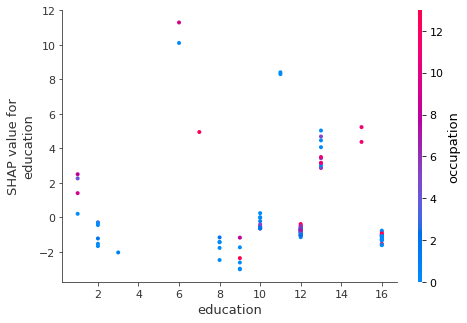

In [15]:
exp.dependence_plot('education')

Displaying row 10 of 100 (use `row_idx` to specify another row)


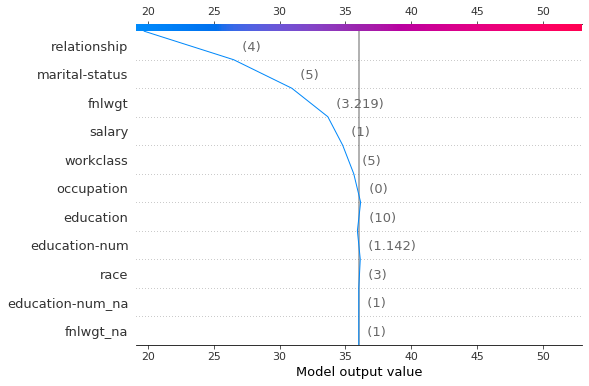

In [16]:
exp.decision_plot(class_id=1, row_idx=10)

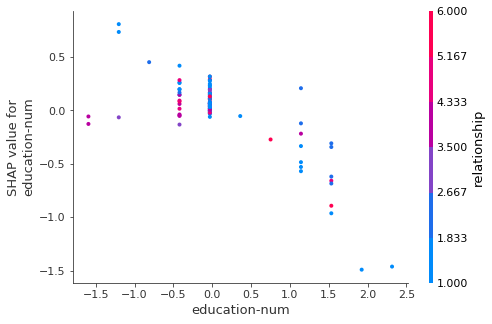

In [18]:
exp.dependence_plot('education-num', class_id=0)

In [19]:
exp.force_plot(class_id=0)

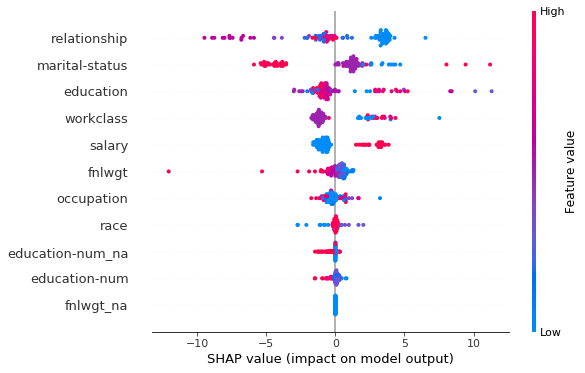

In [20]:
exp.summary_plot()

Displaying row 9 of 100 (use `row_idx` to specify another row)


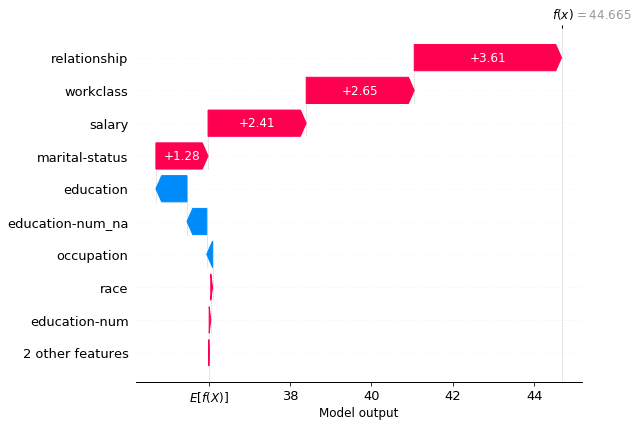

In [23]:
exp.waterfall_plot(row_idx=9)